In [1]:
import sys
import os

sys.path.append(os.path.abspath("C:/Users/seyf/Documents/GitHub/Master-Thesis/code"))

from models_prediction_utils import predict_HuggingFace_models, predict_citizenlab_model

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

c:\Users\seyf\anaconda3\envs\thesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading test set
test = pd.read_csv('Kaggle Toxic Comment Classification Challenge/input/test.csv')
test_labels = pd.read_csv('Kaggle Toxic Comment Classification Challenge/test_labels.csv')

# display(test.head())
# display(test_labels.head())

In [3]:
# Step 1: Filter out rows in `test_labels` where `toxic` is -1 
# Keep only samples with available labels
filtered_test_labels = test_labels[test_labels['toxic'] != -1]

# Step 2: Get the corresponding IDs that remain after filtering
valid_ids = filtered_test_labels['id']

# Step 3: Filter `test` DataFrame to keep only rows with IDs in `valid_ids`
filtered_test = test[test['id'].isin(valid_ids)]


samples = filtered_test['comment_text']
y = filtered_test_labels['toxic']

# Replace NaN values with an empty string
samples = samples.fillna('')
# Convert all entries to string
samples = samples.astype(str)
# Remove control characters
samples = samples.apply(lambda x: ''.join(c for c in x if c.isprintable()))
# Lowercase and remove leading/trailing whitespaces
samples = samples.apply(lambda x: x.lower().strip())

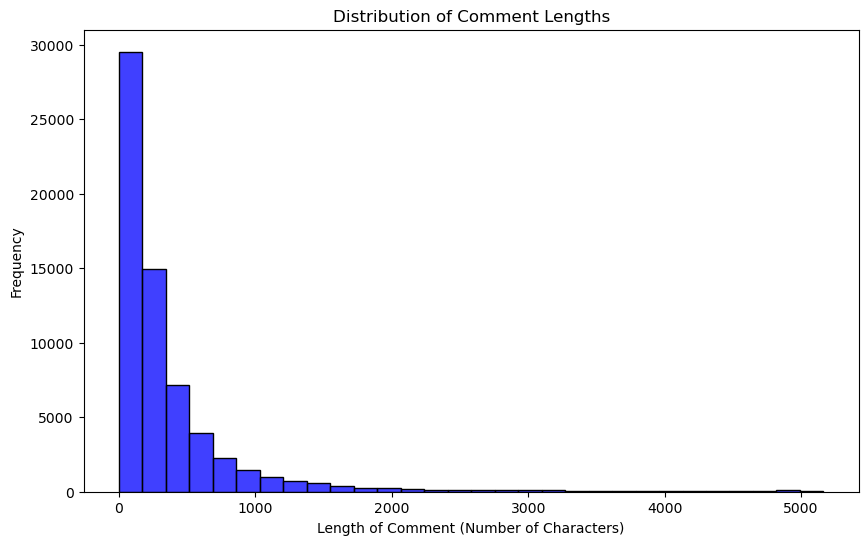

In [4]:

# Calculate the length of each string in the 'samples' list
lengths = samples.apply(len)

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(lengths, kde=False, bins=30, color='blue')  # Adjust bins as needed
plt.title('Distribution of Comment Lengths')
plt.xlabel('Length of Comment (Number of Characters)')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [5]:
# test set size is 63978, computation time too long on my computer
# NB_SAMPLE = 63978
NB_SAMPLE = 500

# Maximum length of a tokens
MAX_LENGTH = 200

# autopilot-ai/EthicalEye

In [6]:
# autopilot-ai/EthicalEye
EthicalEye_model = AutoModelForSequenceClassification.from_pretrained("autopilot-ai/EthicalEye")
EthicalEye_tokenizer = AutoTokenizer.from_pretrained("autopilot-ai/EthicalEye")

In [7]:
EthicalEye_predictions_df = predict_HuggingFace_models("EthicalEye", EthicalEye_model, EthicalEye_tokenizer, samples, NB_SAMPLE, MAX_LENGTH)

display(EthicalEye_predictions_df)

,comment,non_safe_probability
0,thank you for understanding. i think very high...,0.000263
1,:dear god this site is horrible.,0.259078
2,"""::: somebody will invariably try to add relig...",0.831513
3,""" it says it right there that it is a type. t...",0.003455
4,""" == before adding a new product to the list,...",0.000275
...,...,...
495,""" == maryam babangida == your recent drastic...",0.026814
496,c | b1 = yes | b2 = | b3 = yes | b4 =...,0.002929
497,==tunnels wiki project proposal=== we meet ag...,0.000591
498,this comment is signed by tony mansell,0.001556


# KoalaAI/TextClassification

In [8]:
# Load the model and tokenizer
KoalaAI_model = AutoModelForSequenceClassification.from_pretrained("KoalaAI/Text-Moderation")
KoalaAI_tokenizer = AutoTokenizer.from_pretrained("KoalaAI/Text-Moderation")

In [9]:
KoalaAI_predictions_df = predict_HuggingFace_models("KoalaAI", KoalaAI_model, KoalaAI_tokenizer, samples, NB_SAMPLE, MAX_LENGTH)

# Print the DataFrame
display(KoalaAI_predictions_df)


,comment,non_safe_probability
0,thank you for understanding. i think very high...,0.002364
1,:dear god this site is horrible.,0.015980
2,"""::: somebody will invariably try to add relig...",0.122420
3,""" it says it right there that it is a type. t...",0.004228
4,""" == before adding a new product to the list,...",0.001844
...,...,...
495,""" == maryam babangida == your recent drastic...",0.056218
496,c | b1 = yes | b2 = | b3 = yes | b4 =...,0.002057
497,==tunnels wiki project proposal=== we meet ag...,0.002036
498,this comment is signed by tony mansell,0.004928


# citizenlab/distilbert-base-multilingual-cased-toxicity 

In [10]:
# citizenlab/distilbert-base-multilingual-cased-toxicity 
citizenlab_model_path = "citizenlab/distilbert-base-multilingual-cased-toxicity"
citizenlab_toxicity_classifier = pipeline("text-classification", model=citizenlab_model_path, tokenizer=citizenlab_model_path)

In [11]:
citizenlab_predictions_df = predict_citizenlab_model(citizenlab_toxicity_classifier, samples, NB_SAMPLE, MAX_LENGTH)

# Print the DataFrame
display(citizenlab_predictions_df) 

,comment,non_safe_probability
0,thank you for understanding. i think very high...,0.000959
1,:dear god this site is horrible.,0.002999
2,"""::: somebody will invariably try to add relig...",0.067027
3,""" it says it right there that it is a type. t...",0.004718
4,""" == before adding a new product to the list,...",0.000750
...,...,...
495,""" == maryam babangida == your recent drastic...",0.001290
496,c | b1 = yes | b2 = | b3 = yes | b4 =...,0.150544
497,==tunnels wiki project proposal=== we meet ag...,0.001239
498,this comment is signed by tony mansell,0.006390


# ROC curve plot + AUC score
Comparing ROC and AUC for every model on Kaggle Toxic Comment Challenge dataset.

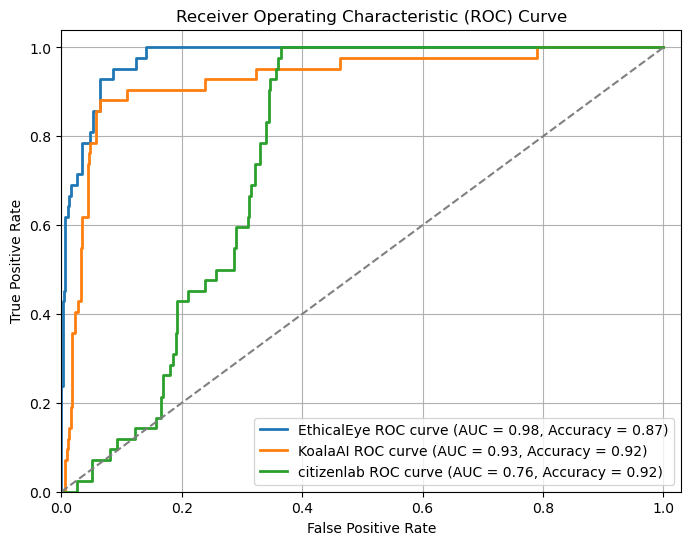


Model Performance Metrics:

     Model      AUC  Accuracy
EthicalEye 0.977854     0.874
   KoalaAI 0.928208     0.922
citizenlab 0.758994     0.916


In [12]:
# y_true should be a 1D array of true binary labels (0 or 1)
y_true = y[:NB_SAMPLE]  # ground truth labels


# Threshold to classify probabilities as positive (1) or negative (0)
threshold = 0.5

# Dictionary to store model names and their predictions
models_predictions = {
    'EthicalEye': EthicalEye_predictions_df['non_safe_probability'],
    'KoalaAI': KoalaAI_predictions_df['non_safe_probability'],
    'citizenlab': citizenlab_predictions_df['non_safe_probability']
    # Add more models here if needed
}

# Data structure to store metrics for each model
metrics_data = []

# Initialize plot
plt.figure(figsize=(8, 6))

# Loop over each model and compute ROC and AUC
for model_name, y_pred in models_predictions.items():
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Calculate binary predictions using the threshold
    y_pred_binary = (y_pred >= threshold).astype(int)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred_binary)

    # Store the metrics in a dictionary
    metrics_data.append({
        'Model': model_name,
        'AUC': roc_auc,
        'Accuracy': accuracy
    })
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.2f}, Accuracy = {accuracy:.2f})')

# Plot the diagonal line (random guess)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Configure plot
plt.xlim([0.0, 1.03])
plt.ylim([0.0, 1.04])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Create a DataFrame from the collected metrics data
metrics_df = pd.DataFrame(metrics_data)

# Display the table of metrics
print("\nModel Performance Metrics:\n")
print(metrics_df.to_string(index=False))